## Title: Introduction to Approximate Bayesian Computation
### Author: Andrea Giussani
#### Series in "The Long Beard Blog" - Oct 2020

## Intro

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
aapl_df = pd.read_csv('data/AAPL.csv')
googl_df = pd.read_csv('data/GOOGL.csv')
fb_df = pd.read_csv('data/FB.csv')

In [3]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    189 non-null    object 
 1   High    189 non-null    float64
 2   Low     189 non-null    float64
 3   Open    189 non-null    float64
 4   Volume  189 non-null    float64
 5   Close   189 non-null    float64
 6   Symbol  189 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.5+ KB


## Data Wrangling

In [4]:
df_all = pd.concat([aapl_df, googl_df, fb_df], axis=0)

In [5]:
df_all.head()

,Date,High,Low,Open,Volume,Close,Symbol
0,2020-01-02,75.150002,73.797501,74.059998,135480400.0,74.573036,AAPL
1,2020-01-03,75.144997,74.125000,74.287498,146322800.0,73.848030,AAPL
2,2020-01-06,74.989998,73.187500,73.447502,118387200.0,74.436470,AAPL
3,2020-01-07,75.224998,74.370003,74.959999,108872000.0,74.086395,AAPL
4,2020-01-08,76.110001,74.290001,74.290001,132079200.0,75.278160,AAPL


In [6]:
df_all['Date'] = df_all[['Date']].apply(lambda x: pd.to_datetime(x))

In [7]:
pivot_close = df_all.pivot(
    index='Date',
    columns='Symbol',
    values='Close'
).sort_index()

In [8]:
pivot_close.head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,74.573036,209.779999,1368.680054
2020-01-03,73.848030,208.669998,1361.520020
2020-01-06,74.436470,212.600006,1397.810059
2020-01-07,74.086395,213.059998,1395.109985
2020-01-08,75.278160,215.220001,1405.040039


In [9]:
ticks_to_use = pivot_close.index[::30]
labels = [ i.strftime("%B-%d") for i in ticks_to_use ]

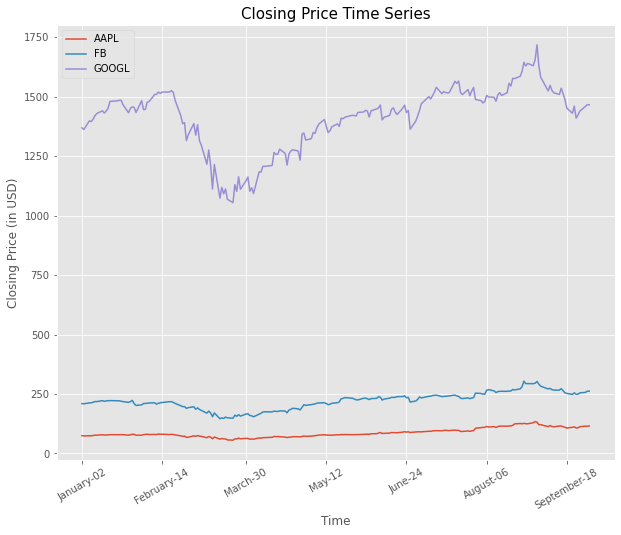

In [10]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8])
    ax.plot(pivot_close.index, pivot_close['AAPL'], label='AAPL') 
    ax.plot(pivot_close.index, pivot_close['FB'], label='FB') 
    ax.plot(pivot_close.index, pivot_close['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Closing Price (in USD)')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Closing Price Time Series', fontdict={'size':15})
    ax.legend(loc='upper left')
    plt.show()

## Data Manipulation

In [11]:
def getting_diff_price(df):
    return df.diff()

In [12]:
getting_diff_price(pivot_close).head()

Symbol,AAPL,FB,GOOGL
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.725006,-1.110001,-7.160034
2020-01-06,0.588440,3.930008,36.290039
2020-01-07,-0.350075,0.459991,-2.700073
2020-01-08,1.191765,2.160004,9.930054


In [13]:
def getting_diff_price(df):
    return df.apply(lambda x: x-x[0], axis=0)

In [14]:
diff_from_start = getting_diff_price(pivot_close)

In [15]:
def get_value_investment_at_date(date):
    df = diff_from_start.loc[date].to_frame().T
    df.columns.name = None
    return df

In [16]:
get_value_investment_at_date('2020-09-30')

,AAPL,FB,GOOGL
2020-09-30,41.236961,52.119995,96.919922


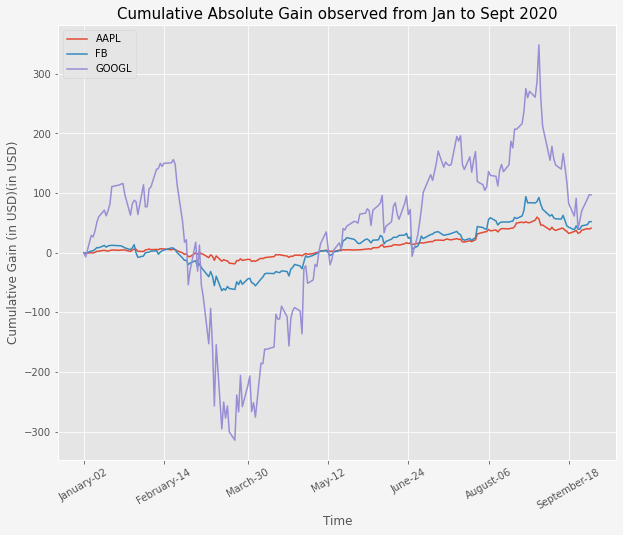

In [17]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8], facecolor="whitesmoke")
    ax.plot(diff_from_start.index, diff_from_start['AAPL'], label='AAPL') 
    ax.plot(diff_from_start.index, diff_from_start['FB'], label='FB') 
    ax.plot(diff_from_start.index, diff_from_start['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cumulative Gain (in USD)(in USD)')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Absolute Gain observed from Jan to Sept 2020', fontdict={'size':15})
    ax.legend(loc='upper left')
    plt.show()

## Financial Returns

In [18]:
def daily_change(row): 
    return row.pct_change()

In [19]:
daily_returns = pivot_close.apply(lambda x: daily_change(x))

In [20]:
daily_returns.head()

,AAPL,FB,GOOGL
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009722,-0.005291,-0.005231
2020-01-06,0.007968,0.018834,0.026654
2020-01-07,-0.004703,0.002164,-0.001932
2020-01-08,0.016086,0.010138,0.007118


## Cumulative Returns

In [21]:
def daily_cum_returns(row):
    return (row + 1).cumprod()

In [22]:
cum_daily_returns = daily_returns.apply(lambda x: daily_cum_returns(x))

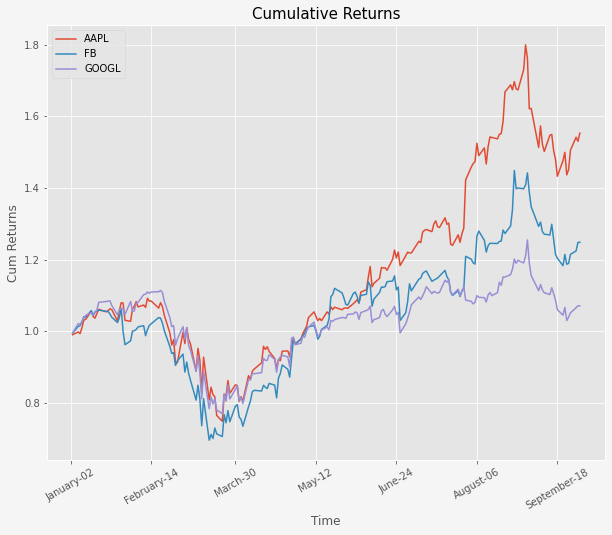

In [23]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=[10,8], facecolor="whitesmoke")
    ax.plot(cum_daily_returns.index, cum_daily_returns['AAPL'], label='AAPL') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['FB'], label='FB') 
    ax.plot(cum_daily_returns.index, cum_daily_returns['GOOGL'], label='GOOGL') 
    ax.set_xlabel('Time')
    ax.set_ylabel('Cum Returns')
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_title('Cumulative Returns', fontdict={'size':15})
    ax.legend(loc='upper left')
    plt.show()